# Data module class 2
Reading documentation: Pandas and BeautifulSoup

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
# download and import BeautifulSoup if you need to
#!pip install beautifulsoup4


## Pandas
### Terminology reference
#### Data structures
##### 1-dimensional data (create Series)

|pandas abbreviation|definition|example|
|---|---|---|
|dict|Python dictionary|`{'a': 'value', 'b': 'value'}`|
|ndarray|N-dimensional array (can be 1 or 2 dimensional)|`[0, 1, 2, 3]`|
|scalar|Single value|`100`|
|list|Python list|`[0, 1, 2, 3]`|

##### 2-dimensional data (create DataFrames)

|pandas term|example|
|---|---|
|ndarray|`[[0, 1, 2, 3], [4, 5, 6, 7]]`|
|dict of ndarrays|`{'one': [1, 2, 3, 4], 'two': [4, 3, 2, 1]}`|
|list of dicts|`[{'id': 1, 'info': 'text'}, {'id': 2, 'info': 'more text'}]`|

#### How do these look when loaded in pandas?
[Taken from the Pandas User Guide](https://pandas.pydata.org/docs/user_guide/dsintro.html)

In [3]:
pd.Series({'a': 'value', 'b': 'value'})

a    value
b    value
dtype: object

In [4]:
pd.Series([0, 1, 2, 3])

0    0
1    1
2    2
3    3
dtype: int64

In [5]:
pd.Series(5)

0    5
dtype: int64

In [6]:
pd.DataFrame([{'id': 1, 'info': 'text'}, {'id': 2, 'info': 'more text'}])

,id,info
0,1,text
1,2,more text


#### Other terms
[See pd.to_datetime() as an example](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime)

#### parameters: Information that a function accepts 
- args
    - Arguments that are required (or things that the function needs in order to run)
    - i.e. data for your DataFrame
- kwargs (even though Pandas does not identify them as such)
    - Keyword arguments: optional arguments not necessary for a function to run, but will tell the function to behave in a different way than the default. Called "keyword" arguments because you have to identify the name of the variable
    - i.e. errors='raise'

### 1. Let's practice input/output with Pandas with the following links.
Use Panda's [IO Tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) section of their documentation to grab these datasets

- [Avengers Wikia data - FiveThirtyEight](https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv) | [Documentation here](https://github.com/fivethirtyeight/data/tree/master/avengers)
- [List of sovereign states - Wikipedia](https://en.wikipedia.org/wiki/List_of_sovereign_states)
- [Homeless housing - LA Times](https://raw.githubusercontent.com/kyleykim/R_Scripts/master/la-me-ln-hhh-unequal/revised_data/master_data_geocoded.csv) | [Documentation](https://github.com/kyleykim/R_Scripts/tree/master/la-me-ln-hhh-unequal)

In [7]:
df_avengers= pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

In [8]:
df_housing= pd.read_csv("https://raw.githubusercontent.com/kyleykim/R_Scripts/master/la-me-ln-hhh-unequal/revised_data/master_data_geocoded.csv")

In [9]:
#!pip3 install lxml 
#for the read_html code, afterwards you have to restart the kernel for it to work


In [10]:
import lxml

In [11]:
df_states= pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


### 2. Let's practice working with missing data and selecting these values
#### For each DataFrame, either select all the missing values of one column or select a unique categorical value.
The [Indexing and selecting data¶](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) section of Pandas documentation will help

#### a. Avengers

In [23]:
df_avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


<AxesSubplot:title={'center':'Missing values for each column'}, xlabel='index'>

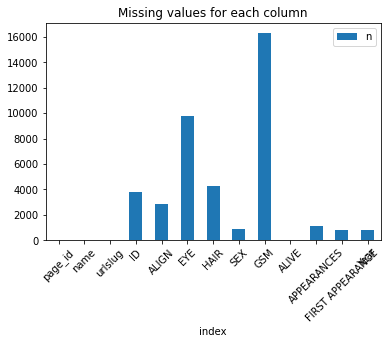

In [22]:


df_avengers.isna(). \
         sum(). \
         reset_index(name="n"). \
         plot.bar(x='index', y='n', rot=45, title="Missing values for each column")

#GSM has the most missing values

In [24]:
df_avengers.GSM.unique()  #show what kind of variable is GSM

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

In [25]:
df_avengers[df_avengers['GSM'].isna()]  #show the rows where GSM is missing

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


#### b. Countries

In [33]:
df_states[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Common and formal names                                          237 non-null    object
 1   Membership within the UN System[a]                               36 non-null     object
 2   Sovereignty dispute[b]                                           47 non-null     object
 3   Further information on status and recognition of sovereignty[d]  134 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


<AxesSubplot:title={'center':'Missing values for each column'}, xlabel='index'>

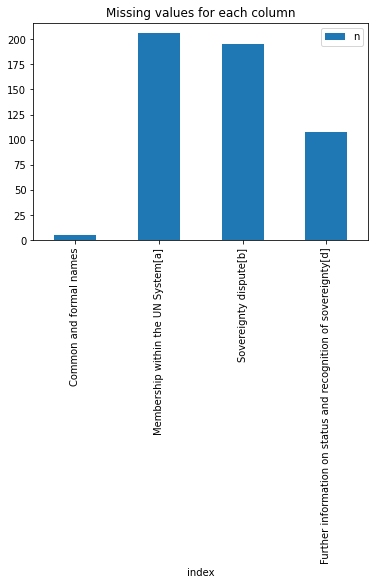

In [35]:
df_states[0].isna(). \
         sum(). \
         reset_index(name="n"). \
         plot.bar(x='index', y='n', title="Missing values for each column")


In [37]:
df_states[0].describe()

,Common and formal names,Membership within the UN System[a],Sovereignty dispute[b],Further information on status and recognition of sovereignty[d]
count,237,36,47,134
unique,237,34,45,119
top,Northern Cyprus – Turkish Republic of Northern...,UN specialized agencies,(See political status),Member of the EU.[c]
freq,1,3,2,15


In [40]:
df_states[0][df_states[0]["Membership within the UN System[a]"].isna()] #show rows there membership with the UN is NaN

,Common and formal names,Membership within the UN System[a],Sovereignty dispute[b],Further information on status and recognition of sovereignty[d]
0,NaN,NaN,NaN,NaN
1,UN member states and observer states ↓,NaN,NaN,NaN
4,Albania – Republic of Albania,NaN,NaN,NaN
5,Algeria – People's Democratic Republic of Algeria,NaN,NaN,NaN
6,Andorra – Principality of Andorra,NaN,NaN,Andorra is a co-principality in which the offi...
...,...,...,...,...
236,Somaliland – Republic of Somaliland,NaN,Somalia,"A de facto independent state,[56][65][66][67][..."
237,South Ossetia – Republic of South Ossetia–the ...,NaN,Georgia,"A de facto independent state,[70] recognised b..."
239,Transnistria – Pridnestrovian Moldavian Republic,NaN,Moldova,"A de facto independent state,[56] recognised o..."
240,NaN,NaN,NaN,NaN


#### c. LA homeless housing

In [41]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  79 non-null     object 
 1   address       79 non-null     object 
 2   district_no   79 non-null     int64  
 3   units         79 non-null     int64  
 4   sh_units      79 non-null     int64  
 5   status        79 non-null     object 
 6   lon           79 non-null     float64
 7   lat           79 non-null     float64
 8   geoAddress    79 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ KB


In [44]:
df_housing.isna().sum() #no missing values

project_name    0
address         0
district_no     0
units           0
sh_units        0
status          0
lon             0
lat             0
geoAddress      0
dtype: int64

In [47]:
df_housing.units.unique()

array([ 26,  57,  42,  62,  64,  75,  43,  49,  56, 100,  50,  59,  97,
        92, 121,  35, 144,  68, 134,  52, 103,  85,  48,  60,  54,  67,
        37,  74,  46,  72,  86,  33, 137, 101,  98,  44,  99,  55, 122,
        77, 104,  95,  41,  94,  93,  71,  51, 180], dtype=int64)

### 3. Let's practice cleaning with intent

#### Use each the three datasets loaded in to generate a question you want to answer with the data
##### Tips
- Show the column list the column types and null values
- Find unique values to look at categorical data

#### a. Avengers
##### Question
- Which Avengers belong to the LGBTQ+ community?

##### What steps do I need to do to answer the question?
- Look at the column GSM and documentation what are missing values
- Which categories belong to LGBTQ+?
- How is the distribution?

In [48]:
# show the dataframe info here to get you started 
df_avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [49]:
df_avengers.GSM.unique()  #there is no heterosexual category so everything that is nan do not bleong/not known

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

In [59]:
df_avengers[df_avengers.GSM.notna()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
28,6545,Natalia Romanova (Earth-616),\/Natalia_Romanova_(Earth-616),Public Identity,Good Characters,Green Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,1050.0,Apr-64,1964.0
42,1818,Hercules (Earth-616),\/Hercules_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,725.0,Oct-65,1965.0
45,2307,Elizabeth Braddock (Earth-616),\/Elizabeth_Braddock_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Purple Hair,Female Characters,Bisexual Characters,Living Characters,708.0,Dec-76,1976.0
61,2042,Loki Laufeyson (Earth-616),\/Loki_Laufeyson_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532.0,Aug-49,1949.0
71,1409,Deadpool (Wade Wilson),\/Deadpool_(Wade_Wilson),Secret Identity,Neutral Characters,Brown Eyes,Bald,Male Characters,Transvestites,Living Characters,500.0,Feb-91,1991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,1914,Xi'an Coy Manh (Earth-616),\/Xi%27an_Coy_Manh_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Dec-80,1980.0
16041,88486,Jazinda Kl'rt-Spawn (Earth-616),\/Jazinda_Kl%27rt-Spawn_(Earth-616),Secret Identity,Good Characters,Green Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Dec-07,2007.0
16144,692153,Aimee (Clint Barton's neighbor) (Earth-616),\/Aimee_(Clint_Barton%27s_neighbor)_(Earth-616),No Dual Identity,Good Characters,Black Eyes,Pink Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Oct-12,2012.0
16363,694577,Finch (Kate Bishop's neighbor) (Earth-616),\/Finch_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Black Eyes,Bald,Male Characters,Homosexual Characters,Living Characters,NaN,NaN,NaN


notna() find values that are not missing.

In [62]:
df_avengers[pd.notna(df_avengers.GSM)]  #2nd method

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
28,6545,Natalia Romanova (Earth-616),\/Natalia_Romanova_(Earth-616),Public Identity,Good Characters,Green Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,1050.0,Apr-64,1964.0
42,1818,Hercules (Earth-616),\/Hercules_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,725.0,Oct-65,1965.0
45,2307,Elizabeth Braddock (Earth-616),\/Elizabeth_Braddock_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Purple Hair,Female Characters,Bisexual Characters,Living Characters,708.0,Dec-76,1976.0
61,2042,Loki Laufeyson (Earth-616),\/Loki_Laufeyson_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532.0,Aug-49,1949.0
71,1409,Deadpool (Wade Wilson),\/Deadpool_(Wade_Wilson),Secret Identity,Neutral Characters,Brown Eyes,Bald,Male Characters,Transvestites,Living Characters,500.0,Feb-91,1991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,1914,Xi'an Coy Manh (Earth-616),\/Xi%27an_Coy_Manh_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Dec-80,1980.0
16041,88486,Jazinda Kl'rt-Spawn (Earth-616),\/Jazinda_Kl%27rt-Spawn_(Earth-616),Secret Identity,Good Characters,Green Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Dec-07,2007.0
16144,692153,Aimee (Clint Barton's neighbor) (Earth-616),\/Aimee_(Clint_Barton%27s_neighbor)_(Earth-616),No Dual Identity,Good Characters,Black Eyes,Pink Hair,Female Characters,Homosexual Characters,Living Characters,NaN,Oct-12,2012.0
16363,694577,Finch (Kate Bishop's neighbor) (Earth-616),\/Finch_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Black Eyes,Bald,Male Characters,Homosexual Characters,Living Characters,NaN,NaN,NaN


<AxesSubplot:>

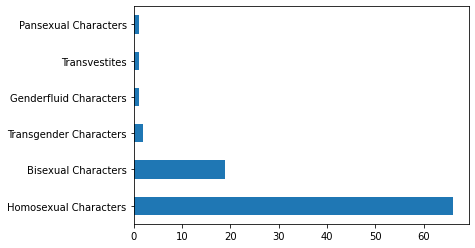

In [79]:
df_avengers[df_avengers.GSM.notna()].GSM.value_counts().plot(kind="barh")


#### b. Countries
##### Question
- Which countries don't have membership with the UN and a sovereignty dispute?

##### What cleaning do I need to do to answer the question
- Look at the relevant columns, identify what missing values mean
- 
- 

In [87]:
df_states[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Common and formal names                                          237 non-null    object
 1   Membership within the UN System[a]                               36 non-null     object
 2   Sovereignty dispute[b]                                           47 non-null     object
 3   Further information on status and recognition of sovereignty[d]  134 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


In [97]:
df_states[0]["Membership within the UN System[a]"].unique()  #a lot of direction to further links

array([nan, 'Abkhazia → See Abkhazia listing', 'UN member state',
       'Artsakh → See Artsakh listing', 'Burma → See Myanmar listing',
       'China, Republic of → See Taiwan listing',
       'Cook Islands → See Cook Islands listing',
       "Côte d'Ivoire → See Ivory Coast listing",
       "Democratic People's Republic of Korea → See Korea, North listing",
       'Democratic Republic of the Congo → See Congo, Democratic Republic of the listing',
       'Holy See → See Vatican City listing',
       'Kosovo → See Kosovo listing',
       'Macedonia → See North Macedonia listing',
       'Nagorno-Karabakh → See Artsakh listing',
       'Niue → See Niue listing',
       'North Korea → See Korea, North listing',
       'Northern Cyprus → See Northern Cyprus listing',
       'UN observer state; member of 2 UN specialized agencies',
       'Pridnestrovie → See Transnistria listing',
       'Republic of Korea → See Korea, South listing',
       'Republic of the Congo → See Congo, Republic of

In [100]:
df_states[0]["Sovereignty dispute[b]"].unique()

array([nan, 'Abkhazia → See Abkhazia listing',
       'Not recognised by Pakistan.', 'Artsakh → See Artsakh listing',
       'Burma → See Myanmar listing',
       'Partially unrecognised. Republic of China',
       'China, Republic of → See Taiwan listing',
       'Cook Islands → See Cook Islands listing',
       "Côte d'Ivoire → See Ivory Coast listing",
       'Not recognised by Turkey[13]',
       "Democratic People's Republic of Korea → See Korea, North listing",
       'Democratic Republic of the Congo → See Congo, Democratic Republic of the listing',
       'Holy See → See Vatican City listing', 'Partially unrecognised',
       'South Korea', 'North Korea', 'Kosovo → See Kosovo listing',
       'Macedonia → See North Macedonia listing',
       'Nagorno-Karabakh → See Artsakh listing',
       'Niue → See Niue listing',
       'North Korea → See Korea, North listing',
       'Northern Cyprus → See Northern Cyprus listing',
       'Partially unrecognised. Israel',
       'Pridnestro

#### c. LA homeless housing
##### Question
- Which area has the most homeless housings?

##### What cleaning do I need to do to answer the question
- Which column is responsible for area?
- How do you count houses per area?
- Missing values?

In [102]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  79 non-null     object 
 1   address       79 non-null     object 
 2   district_no   79 non-null     int64  
 3   units         79 non-null     int64  
 4   sh_units      79 non-null     int64  
 5   status        79 non-null     object 
 6   lon           79 non-null     float64
 7   lat           79 non-null     float64
 8   geoAddress    79 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ KB


In [104]:
df_housing.head(5)

,project_name,address,district_no,units,sh_units,status,lon,lat,geoAddress
0,Reseda Theater Senior Housing (Canby Woods West),7221 N CANBY AVE CA 91335,3,26,13,Already approved,-118.535105,34.201798,"7221 canby ave, reseda, ca 91335, usa"
1,Main Street Apartments,5501 S MAIN ST CA 90037,9,57,56,Already approved,-118.274276,33.992203,"5501 s main st, los angeles, ca 90037, usa"
2,Berendo Sage,1035 S BERENDO ST CA 90006,1,42,21,Already approved,-118.294014,34.051678,"1035 s berendo st, los angeles, ca 90006, usa"
3,South Main Street Apartments,12003 S MAIN ST CA 90061,15,62,61,Already approved,-118.274250,33.923439,"12003 s main st, los angeles, ca 90061, usa"
4,Montecito II Senior Housing,6668 W FRANKLIN AVE HOLLYWOOD CA 90028,13,64,32,Already approved,-118.335282,34.105027,"6668 franklin ave, los angeles, ca 90028, usa"


In [113]:
#Check if the projects are unique
df_housing.project_name.is_unique

True

In [132]:
projects_per_dist= df_housing.groupby(by="district_no").project_name.count().reset_index()
projects_per_dist

,district_no,project_name
0,1,11
1,2,2
2,3,1
3,4,3
4,5,1
5,6,3
6,7,3
7,8,11
8,9,8
9,10,7


<AxesSubplot:xlabel='LA District Number', ylabel='Number of housings'>

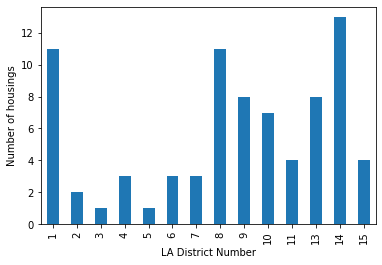

In [143]:
projects_per_dist.plot(x="district_no", y="project_name", kind="bar", ylabel="Number of housings", xlabel="LA District Number",legend=False)

Take a look at the [LA Times'](https://github.com/datadesk/notebooks) or [FiveThirtyEight's](https://github.com/fivethirtyeight/data) for more practice

## BeautifulSoup
[BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [151]:
# load in the HTML and format for BS
sp_wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp_page_r = requests.get(sp_wiki_url)
sp_bs = BeautifulSoup(sp_page_r.content)

In [153]:
# find the title tag
sp_bs.title

<title>List of S&amp;P 500 companies - Wikipedia</title>

The **a** tag defines a hyperlink, which is used to link from one page to another.

The most important attribute of the **a** element is the href attribute, which indicates the link's destination.

In [155]:
# grab the first a tag
sp_bs.a

<a id="top"></a>

In [156]:
# finds all a tags
sp_bs.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/S%26P_500" title="S&amp;P 500">S&amp;P 500</a>,
 <a href="/wiki/Stock_market_index" title="Stock market index">stock market index</a>,
 <a href="/wiki/S%26P_Dow_Jones_Indices" title="S&amp;P Dow Jones Indices">S&amp;P Dow Jones Indices</a>,
 <a href="/wiki/Common_stock" title="Common stock">common stocks</a>,
 <a href="/wiki/Market_capitalization" title="Market capitalization">large-cap</a>,
 <a href="/wiki/Dow_Jones_Industrial_Average" title="Dow Jones Industrial Average">Dow Jones Industrial Average</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="#S&amp;P_500_component_stocks"><span class="tocnumber">1</span> <span class="toctext">S&amp;P 500 component stocks</span></a>,
 <a href="#Selected_changes_to_the_list_of_S&amp;P_500_components"><span class="tocnumber">2</span> <span class="toctext

In [160]:
# find all elements with the class "mw-jump-link"
sp_bs.find_all(class_='mw-jump-link')   ###have to use underscore with class?

[<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>]

#### Format the first table of the list of S&P 500 companies wiki page as a dataframe

[Traversing the DOM - W3C](https://www.w3.org/wiki/Traversing_the_DOM)

In [163]:
# find where the data you want resides (a tag, class name, etc)
sp_wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(sp_wiki_url,match='CIK')
pd.DataFrame(table[0])   ##solution from Adriano

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### We can do more cleaning here